label: [[0.76, 899, 1200, 230], [1.07, 899, 1200, 20], [1.02, 899, 1200, 275], [1.06, 899, 1200, 7], [1.06, 899, 1200, 83]]
1枚目


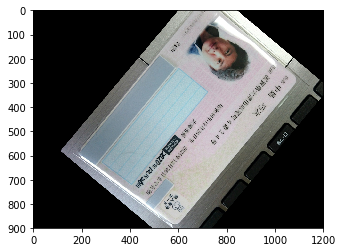

2枚目


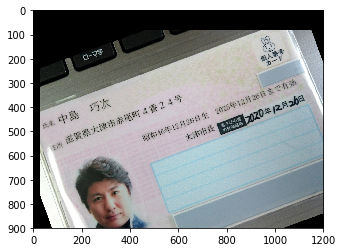

3枚目


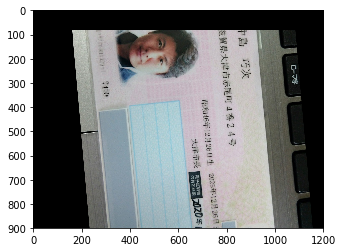

4枚目


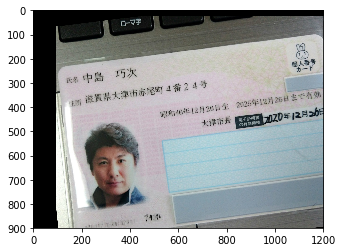

5枚目


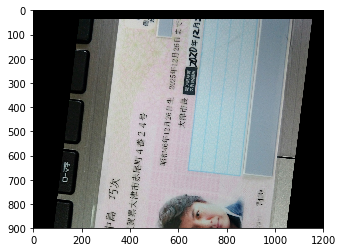

これ以降、画像復元
1枚目


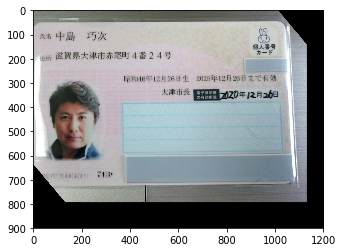

2枚目


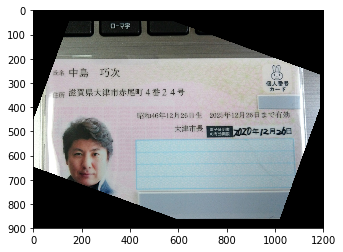

3枚目


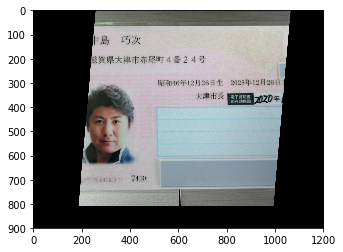

4枚目


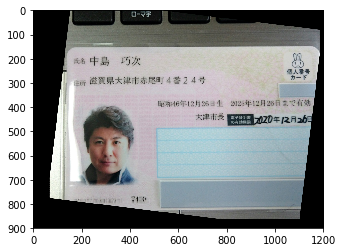

5枚目


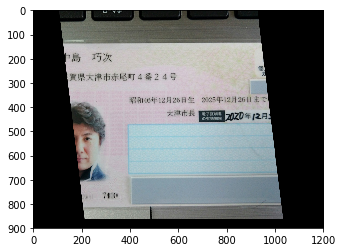

In [10]:
#  画像1つに対して、パラメーター４つのラベルをつける

import matplotlib.pyplot as plt
import cv2
import numpy as np
import random




#  以下は画像を読み込んで、回転、拡大縮小、平行移動する処理


# パラメーター一覧
#  生成する画像の数
num_image = 5
#  生成する画像の一辺のサイズ（正方形を想定）
image_size=200
# 以下の範囲内でランダムに画像を拡大、縮小。
#  画像を縮小するときの最小%
size_min = 70
#  画像を拡大するときの最大%
size_max = 120
# 画像を回転させる時の最大角度
ang_max = 360


label_list=[]
images = []
for i in range(num_image):
    
    img = cv2.imread('image/mynumber08.jpg')
    
    row ,col ,ch = img.shape
    #画像のサイズ
    scale = random.randint(size_min,size_max)
    scale = scale / 100
    
    #　平行移動のパラメーター
    move = image_size/ 2
    dy =random.randint(0,move)
    dx =random.randint(0,move)
    
    # 回転角度
    ang = random.randint(0,ang_max)
    
    # これらのパラメーターをラベルとして格納
    label_list.append([scale,row,col,ang])


   #  回転、拡大縮小を実施
    M = cv2.getRotationMatrix2D( (col/2 , row/2), ang,scale)
    dst = cv2.warpAffine(img,M,(col,row))
    #  平行移動を実施　横への移動はdx  縦への移動はdy
    M1 = np.float64([[1,0,dx],[0,1,dy]])
    dst2 = cv2.warpAffine(dst,M1,(col,row))
    
    cv2.imwrite('gene_image/new_image'+str(i)+'.jpg', dst2)
    images.append(dst2)


print('label:',label_list)
    
#  変形した画像を表示
IMG = np.array(images)
for num , imge in enumerate(IMG):
    print('{}枚目'.format(num+1))
    plt.imshow(cv2.cvtColor(imge, cv2.COLOR_BGR2RGB))
    plt.show()  

    
    
    
# ここから変形した画像を元に戻す処理
#  上の処理で決まった　scale=拡大縮小率　row＝縦移動　col=横移動　ang=回転角度　を使って復元。

print('これ以降、画像復元')
return_images=[]
for idx,img in enumerate(IMG):
    scale = label_list[idx][0]
    row = label_list[idx][1]
    col = label_list[idx][2]
    ang= label_list[idx][3]
    sca=1/scale
    M = cv2.getRotationMatrix2D( (col/2 , row/2), -ang,sca)
    dst = cv2.warpAffine(img,M,(col,row))
    M1 = np.float64([[1,0,-dx],[0,1,-dy]])
    dst2 = cv2.warpAffine(dst,M1,(col,row))
    return_images.append(dst2)

IMG = np.array(return_images)
for num ,img in enumerate(IMG):
    print('{}枚目'.format(num+1))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()  
  

    
    
